<a href="https://colab.research.google.com/github/HariiAravinth/Diabetes-Prediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Set

In [97]:
df = pd.read_csv("/content/diabetes.csv")

# Exploratory Data Analysis

In [98]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [99]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [100]:
df.shape

(768, 9)

Renaming the Columns

In [101]:
df = df.rename(columns = {"Pregnancies": "pregnancies", "Glucose": "glucose", "BloodPressure": "blood pressure", "SkinThickness": "skinthickness", "Insulin" : "insulin","DiabetesPedigreeFunction" : "dpf", "Age" : "age"})

In [102]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape)

Number of duplicate rows: (0, 9)


In [103]:
df.head(10)

,pregnancies,glucose,blood pressure,skinthickness,insulin,BMI,dpf,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Checking for NULL values

In [104]:
print(df.isnull().sum())


pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64


Columns where zero values are misleading

In [105]:
invalid_zero_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']

#df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

print(df.isnull().sum())


pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64


Box Plots for  Visual Outlier Detection

<Axes: xlabel='pregnancies'>

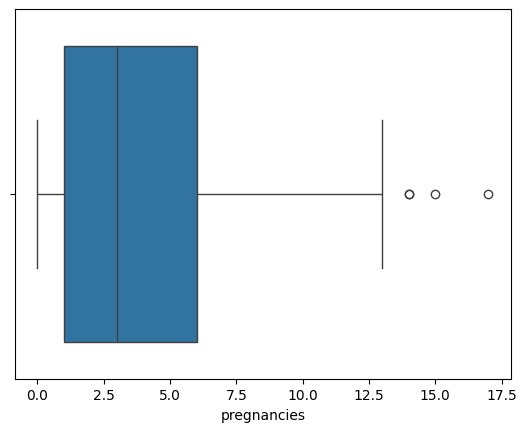

In [106]:
sns.boxplot(x = df['pregnancies'])

<Axes: xlabel='glucose'>

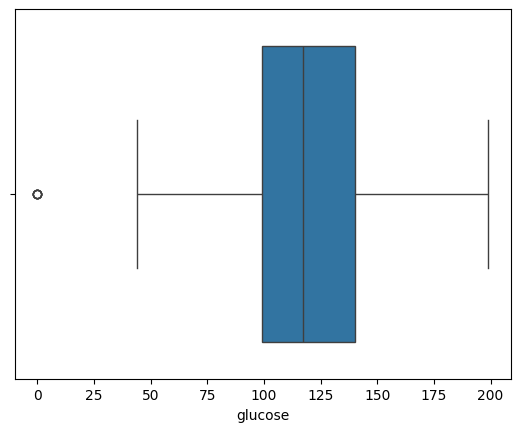

In [107]:
sns.boxplot(x = df['glucose'])


<Axes: xlabel='dpf'>

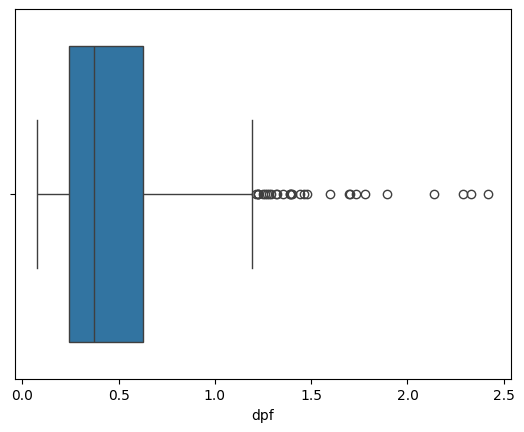

In [108]:
sns.boxplot(x = df['dpf'])

Z score outlier removal

In [109]:
import statistics

df['z_score'] = np.abs(stats.zscore(df['dpf']))

# Remove outliers (e.g., threshold of 3)
df= df[df['z_score'] < 3].drop(columns=['z_score'])
print("\nDataFrame after Z-score outlier removal:")
print(df)


DataFrame after Z-score outlier removal:
     pregnancies  glucose  blood pressure  skinthickness  insulin   BMI  \
0              6      148              72             35        0  33.6   
1              1       85              66             29        0  26.6   
2              8      183              64              0        0  23.3   
3              1       89              66             23       94  28.1   
5              5      116              74              0        0  25.6   
..           ...      ...             ...            ...      ...   ...   
763           10      101              76             48      180  32.9   
764            2      122              70             27        0  36.8   
765            5      121              72             23      112  26.2   
766            1      126              60              0        0  30.1   
767            1       93              70             31        0  30.4   

       dpf  age  Outcome  
0    0.627   50        1  
1  

Applying Simple imputer

In [110]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace 0 with NaN for features known to be missing
X = df.copy()
X[['insulin', 'skinthickness']] = X[['insulin', 'skinthickness']].replace(0, np.nan)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X[['insulin', 'skinthickness']] = imputer.fit_transform(X[['insulin', 'skinthickness']])


In [111]:
# 1. Calculate IQR
Q1 = df['dpf'].quantile(0.25)
Q3 = df['dpf'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter out outliers
df = df[(df['dpf'] >= lower_bound) & (df['dpf'] <= upper_bound)]

print("DataFrame after IQR-based outlier removal:")
print(df.shape)

DataFrame after IQR-based outlier removal:
(733, 9)


<Axes: xlabel='dpf'>

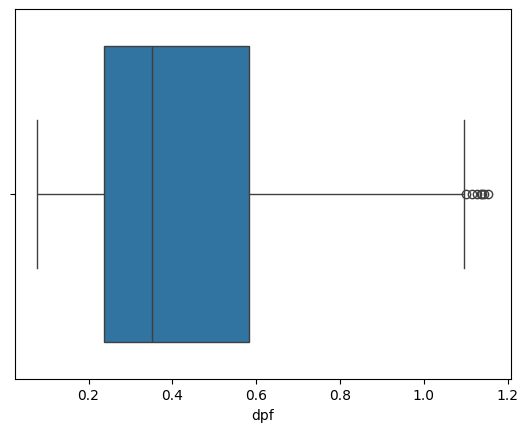

In [112]:
sns.boxplot(x = df['dpf'])

In [113]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd

Splitting Training and Test Data

In [114]:
X = df[['pregnancies','glucose','blood pressure','skinthickness','insulin','dpf','age']]
y = df['Outcome']

In [115]:
df.describe


<bound method NDFrame.describe of      pregnancies  glucose  blood pressure  skinthickness  insulin   BMI  \
0              6      148              72             35        0  33.6   
1              1       85              66             29        0  26.6   
2              8      183              64              0        0  23.3   
3              1       89              66             23       94  28.1   
5              5      116              74              0        0  25.6   
..           ...      ...             ...            ...      ...   ...   
763           10      101              76             48      180  32.9   
764            2      122              70             27        0  36.8   
765            5      121              72             23      112  26.2   
766            1      126              60              0        0  30.1   
767            1       93              70             31        0  30.4   

       dpf  age  Outcome  
0    0.627   50        1  
1    0.351   31        0  
2    0.672   32        1  
3    0.167   21        0  
5    0.201   30        0  
..     ...  ...      ...  
763  0.171   63        0  
764  0.340   27        0  
765  0.245   30        0  
766  0.349   47        1  
767  0.315   23        0  

[733 rows x 9 columns]>

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")



Training data shape: X_train=(586, 7), y_train=(586,)
Testing data shape: X_test=(147, 7), y_test=(147,)


In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [118]:
# Replace 0s with np.nan for medically invalid features
missing_as_zero_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']

df[missing_as_zero_cols] = df[missing_as_zero_cols].replace(0, np.nan)


Fair Cut Imputation

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def faircut_impute(df, strategy="mean", max_depth=5, reduce_to_6=True, target_col="Outcome"):
    """
    FairCut Tree Imputer with dimension reduction support.

    Parameters:
        df (pd.DataFrame): DataFrame with numeric features and target.
        strategy (str): Strategy for SimpleImputer fallback ('mean' or 'median').
        max_depth (int): Max depth of decision tree regressor.
        reduce_to_6 (bool): Whether to drop one feature to keep only 6.
        target_col (str): Name of the target column to exclude from imputation.

    Returns:
        pd.DataFrame: Imputed DataFrame with 6 features + target.
    """
    df_imputed = df.copy()
    numeric_cols = df_imputed.select_dtypes(include=np.number).columns.drop(target_col)

    for col in numeric_cols:
        if df_imputed[col].isnull().sum() == 0:
            continue

        train_data = df_imputed[df_imputed[col].notnull()]
        missing_data = df_imputed[df_imputed[col].isnull()]

        if len(missing_data) == 0 or len(train_data) < 10:
            # Fallback: too few rows
            median_value = df_imputed[col].median()
            df_imputed[col].fillna(median_value, inplace=True)
            continue

        try:
            X_train = train_data.drop(columns=[col, target_col])
            y_train = train_data[col]

            # Handle remaining missing in X
            if X_train.isnull().sum().sum() > 0:
                X_train = SimpleImputer(strategy=strategy).fit_transform(X_train)

            tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
            tree.fit(X_train, y_train)

            X_missing = missing_data.drop(columns=[col, target_col])
            if X_missing.isnull().sum().sum() > 0:
                X_missing = SimpleImputer(strategy=strategy).fit_transform(X_missing)

            imputed_values = tree.predict(X_missing)
            df_imputed.loc[df_imputed[col].isnull(), col] = imputed_values

        except Exception as e:
            # Fallback on failure
            median_value = df_imputed[col].median()
            df_imputed[col].fillna(median_value, inplace=True)
            print(f"[Fallback on {col}] Reason: {e}")

    # Optional: Reduce features to 6
    if reduce_to_6:
        # Recommended 6 based on SHAP/TabNet/clinical insight
        keep_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
        if all(col in df_imputed.columns for col in keep_cols):
            df_imputed = df_imputed[keep_cols + [target_col]]
        else:
            print("Warning: Not all selected columns present. Skipping reduction.")

    return df_imputed


In [120]:
df_faircut = faircut_impute(df)
df_faircut.head(10)

X_faircut = df_faircut.drop("Outcome", axis=1).values.astype(np.float32)
y_faircut = df_faircut["Outcome"].values.astype(np.float32)

X_train_faircut, X_test_faircut, y_train_faircut, y_test_faircut = train_test_split(
    X_faircut, y_faircut, test_size=0.2, stratify=y_faircut, random_state=42
)

[Fallback on blood pressure] Reason: X has 6 features, but DecisionTreeRegressor is expecting 7 features as input.
[Fallback on skinthickness] Reason: X has 6 features, but DecisionTreeRegressor is expecting 7 features as input.


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['insulin']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/tmp/ipython-input-653045577.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(median_value, inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['insulin']. At least one non-mis

Standard Scaler

In [121]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Smote

In [122]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns #

Installing SHAP

In [124]:
!pip install shap
import shap




# Implementation of Traditional Models

Logistic Regression

In [125]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Adjust path if needed

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
ROC AUC Score: 0.8128558310376492


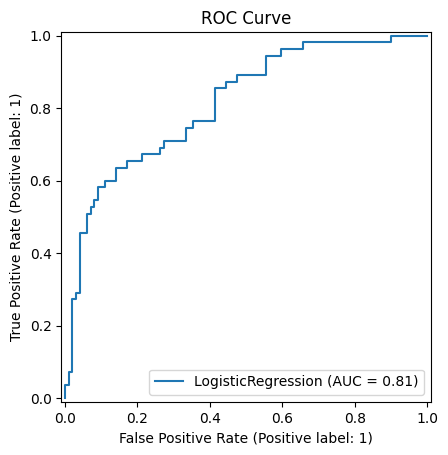

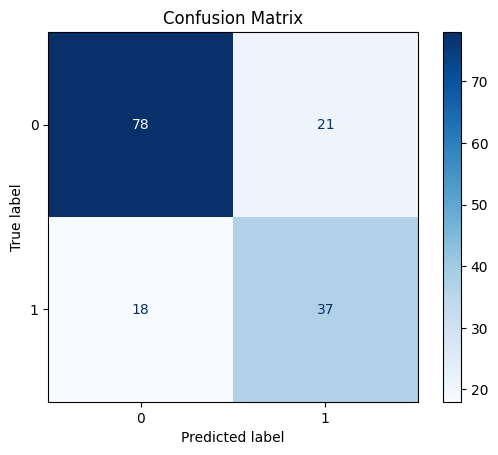

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


SHAP Global Feature Importance (Bar Plot):


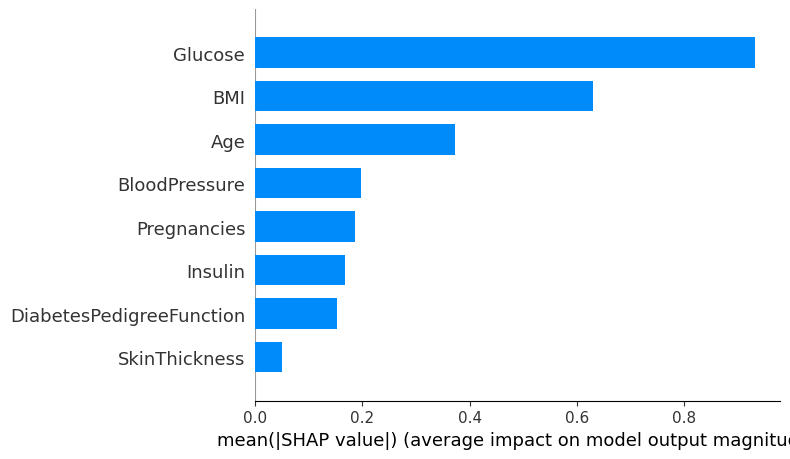


SHAP Detailed Summary Plot (Beeswarm):


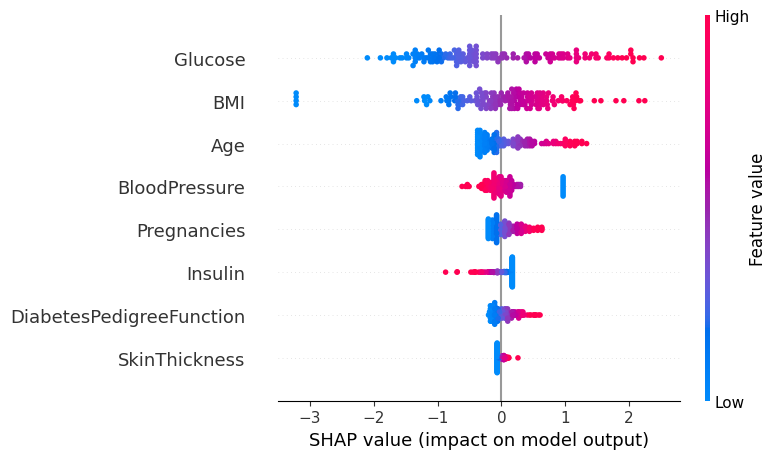


SHAP Waterfall Plot for a Single Prediction:


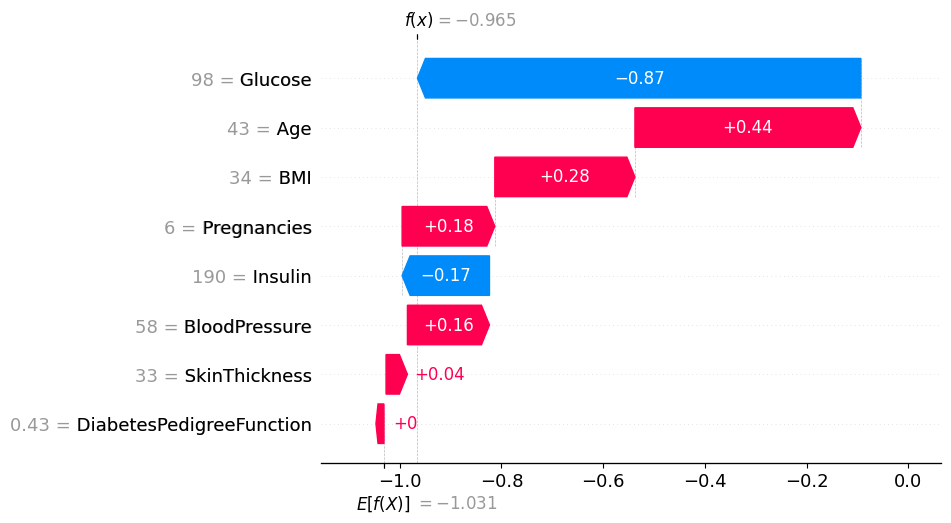

In [127]:
explainer = shap.Explainer(model, X_train)

# 2. Calculate SHAP values for the test data
shap_values = explainer(X_test)

# 3. Visualize the results

# Global Feature Importance (Bar Plot)
print("SHAP Global Feature Importance (Bar Plot):")
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# Detailed Summary Plot (Beeswarm Plot)
print("\nSHAP Detailed Summary Plot (Beeswarm):")
shap.summary_plot(shap_values, X_test)
plt.show()

# Individual Prediction Explanation (Waterfall Plot for the first test instance)
print("\nSHAP Waterfall Plot for a Single Prediction:")
shap.plots.waterfall(shap_values[0])
plt.show()

Applying Decision Tree for hierachial mode of classification

In [128]:
# Separate features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load the dataset
df = pd.read_csv("diabetes.csv")
# Create and train the Decision Tree model
# Using random_state ensures that the results are reproducible
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Print evaluation metrics
print("--- Decision Tree Evaluation ---")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))

--- Decision Tree Evaluation ---

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[75 24]
 [15 40]]

Accuracy: 0.7467532467532467
ROC AUC Score: 0.7424242424242424


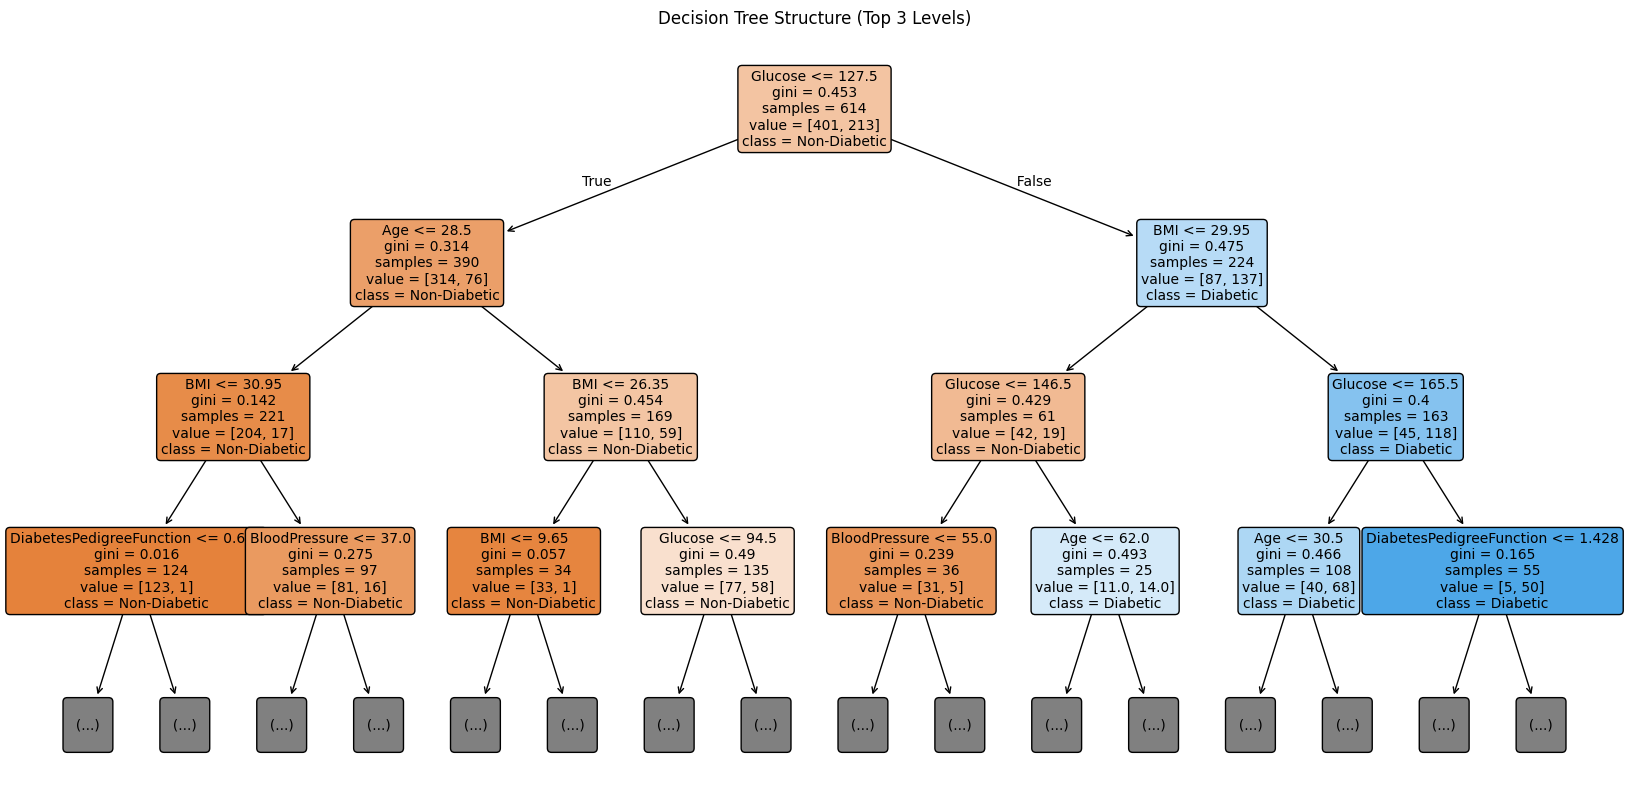

In [131]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth to 3 levels for clarity
          fontsize=10)
plt.title("Decision Tree Structure (Top 3 Levels)")
plt.show()

Random Forest Classifier

In [132]:
# Separate features (X) and the target variable (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# Create and train the Random Forest model
rf_model_unaltered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_unaltered.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [134]:
# Make predictions on the test data
y_pred_rf = rf_model_unaltered.predict(X_test)
y_proba_rf = rf_model_unaltered.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("--- Random Forest Evaluation (Unaltered Data) ---")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

--- Random Forest Evaluation (Unaltered Data) ---

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[77 22]
 [21 34]]

Accuracy: 0.7207792207792207
ROC AUC Score: 0.8120293847566575


<class 'numpy.ndarray'>
(154, 8, 2)
(154, 8)

--- SHAP Feature Importance for Random Forest ---


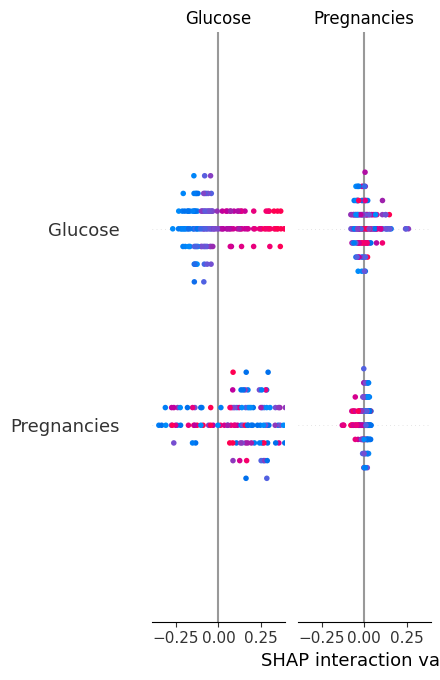

In [135]:
# Create a SHAP explainer for the Random Forest model
rf_explainer = shap.TreeExplainer(rf_model_unaltered)

# Calculate SHAP values for the test data
rf_shap_values = rf_explainer.shap_values(X_test)

# Check shape (optional debug step)
print(type(rf_shap_values))
print(np.array(rf_shap_values).shape)
print(X_test.shape)

# Plot the SHAP summary (no index if binary classification)
print("\n--- SHAP Feature Importance for Random Forest ---")
shap.summary_plot(rf_shap_values, X_test)

plt.show()


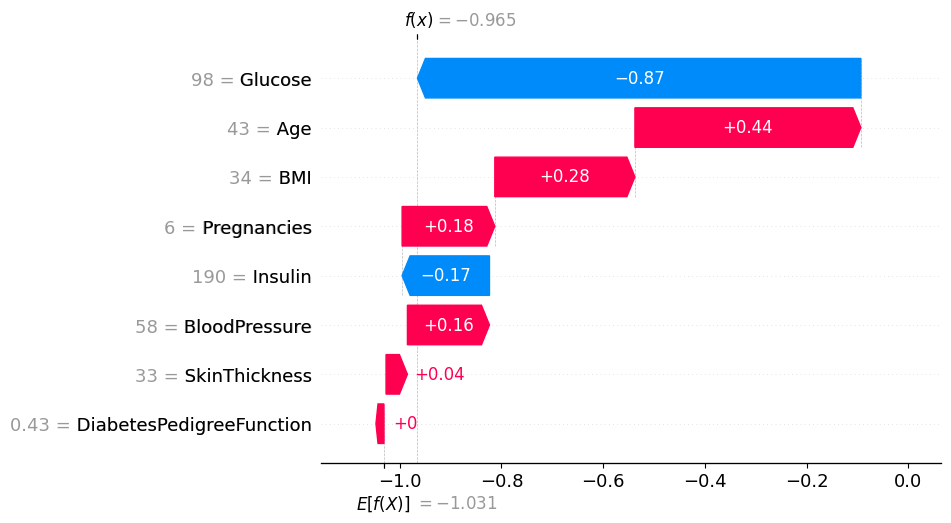

In [136]:
shap.plots.waterfall(shap_values[0])

# Optional: use plt.show() to ensure display in some environments
plt.show()

Implementing XGBoost

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [138]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:39:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [139]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Classification Report
print("\n XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7337662337662337
Precision: 0.6226415094339622
Recall: 0.6111111111111112
F1 Score: 0.616822429906542
ROC AUC: 0.8051851851851852

 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



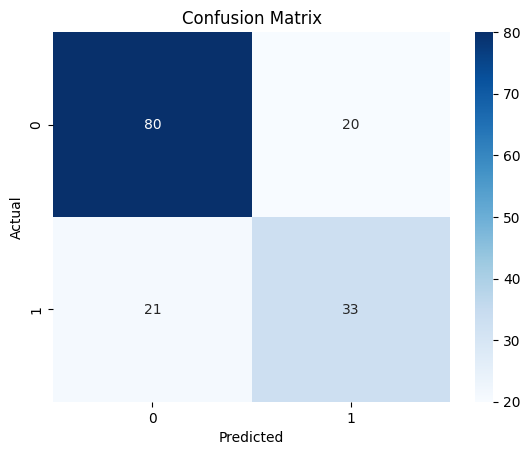

In [140]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


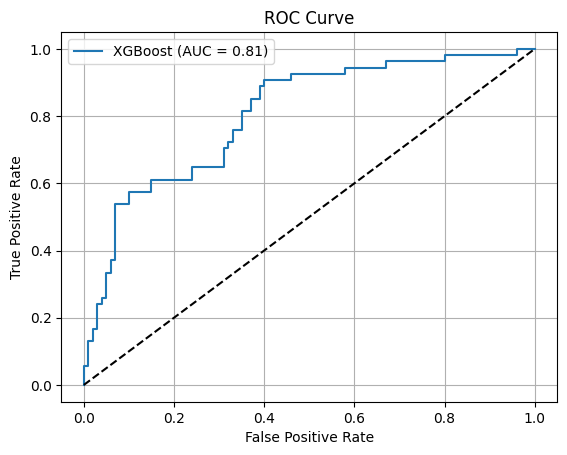

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


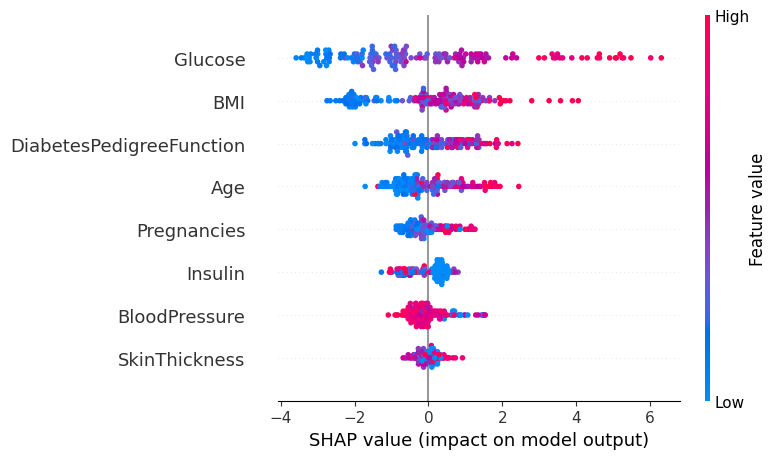

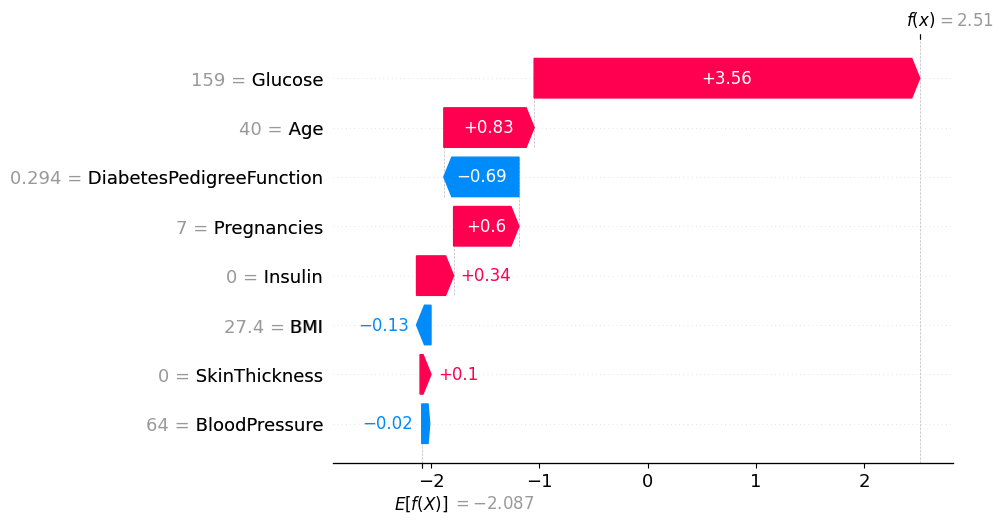

In [142]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)

# Waterfall plot for a single instance
shap.plots.waterfall(shap_values[0])


In [143]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

# Implementation of TabNet Classifier

In [145]:
!rm -rf /usr/local/lib/python3.11/dist-packages/~etworkx*


In [146]:
!pip uninstall -y networkx
!pip install networkx==2.8.8


Found existing installation: networkx 2.8.8
Uninstalling networkx-2.8.8:
  Successfully uninstalled networkx-2.8.8
  Using cached networkx-2.8.8-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)


In [147]:
!pip uninstall -y scikit-image nx-cugraph-cu12


In [148]:
tabnet_clf2 = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,       # width of decision and attention layers, and number of decision steps
    gamma=1.3,                    # feature reuse penalty (default 1.3)
    lambda_sparse=1e-3,           # sparsity regularization to encourage feature selection
    optimizer_params=dict(lr=2e-2)
)


In [149]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Define and train the model
tabnet_clf = TabNetClassifier(seed=42)

tabnet_clf2.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['val'],
    eval_metric=['auc'],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.05286 | val_auc: 0.55037 |  0:00:00s
epoch 1  | loss: 0.8446  | val_auc: 0.57259 |  0:00:00s
epoch 2  | loss: 0.70801 | val_auc: 0.63907 |  0:00:00s
epoch 3  | loss: 0.63512 | val_auc: 0.62963 |  0:00:00s
epoch 4  | loss: 0.58696 | val_auc: 0.68796 |  0:00:00s
epoch 5  | loss: 0.56515 | val_auc: 0.72222 |  0:00:00s
epoch 6  | loss: 0.53408 | val_auc: 0.74278 |  0:00:00s
epoch 7  | loss: 0.52838 | val_auc: 0.75389 |  0:00:00s
epoch 8  | loss: 0.51732 | val_auc: 0.76222 |  0:00:00s
epoch 9  | loss: 0.52145 | val_auc: 0.76963 |  0:00:01s
epoch 10 | loss: 0.5295  | val_auc: 0.77444 |  0:00:01s
epoch 11 | loss: 0.5093  | val_auc: 0.77741 |  0:00:01s
epoch 12 | loss: 0.49864 | val_auc: 0.78426 |  0:00:01s
epoch 13 | loss: 0.47841 | val_auc: 0.78815 |  0:00:01s
epoch 14 | loss: 0.48819 | val_auc: 0.79037 |  0:00:01s
epoch 15 | loss: 0.47836 | val_auc: 0.78648 |  0:00:02s
epoch 16 | loss: 0.4695  | val_auc: 0.79481 |  0:00:02s
epoch 17 | loss: 0.4699  | val_auc: 0.79907 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.7207792207792207
Precision: 0.6222222222222222
Recall: 0.5185185185185185
F1 Score: 0.5656565656565656
AUC: 0.799074074074074
R² Score: 0.2034357190132141

Confusion Matrix:
 [[83 17]
 [26 28]]

TabNet Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



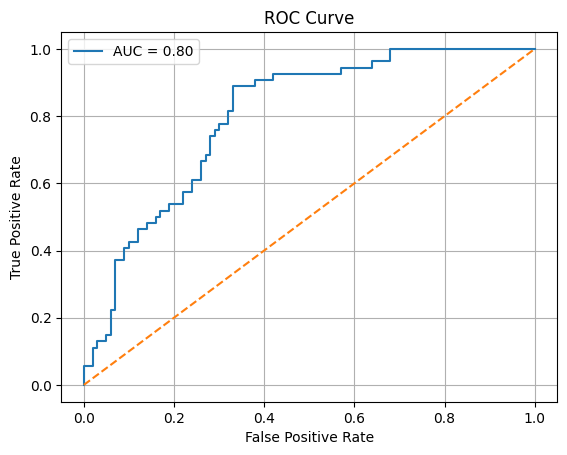

In [150]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities and class labels
probs = tabnet_clf2.predict_proba(X_test)[:, 1]  # probability of the positive class
preds = (probs >= 0.5).astype(int)

# Compute metrics
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("AUC:", roc_auc_score(y_test, probs))
print("R² Score:", r2_score(y_test, probs))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nTabNet Classification Report:\n", classification_report(y_test, preds))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [151]:
df_faircut = faircut_impute(df)
df_faircut.head(10)

X_faircut = df_faircut.drop("Outcome", axis=1).values.astype(np.float32)
y_faircut = df_faircut["Outcome"].values.astype(np.float32)

X_train_faircut, X_test_faircut, y_train_faircut, y_test_faircut = train_test_split(
    X_faircut, y_faircut, test_size=0.2, stratify=y_faircut, random_state=42
)

improvised Tabnet

In [152]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Scale the input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Convert to int for TabNet
y_train_np = np.array(y_train).astype(int)
y_test_np = np.array(y_test).astype(int)

# Compute class weights to handle imbalance
classes = np.unique(y_train_np)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_np)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Convert to PyTorch tensor (optional for GPU later)
weights_array = np.vectorize(class_weights_dict.get)(y_train_np)

# Define TabNet Classifier
tabnet_clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',  # better for interpretability than 'sparsemax'
    seed=42,
    verbose=10
)

# Fit the model
tabnet_clf.fit(
    X_train=X_train, y_train=y_train_np,
    eval_set=[(X_train, y_train_np), (X_test, y_test_np)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,               # Smaller batch size helps TabNet generalize better
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83016 | train_auc: 0.75166 | train_accuracy: 0.57492 | val_auc: 0.70481 | val_accuracy: 0.59091 |  0:00:00s
epoch 10 | loss: 0.5262  | train_auc: 0.86023 | train_accuracy: 0.77524 | val_auc: 0.79167 | val_accuracy: 0.68182 |  0:00:09s
epoch 20 | loss: 0.47581 | train_auc: 0.87879 | train_accuracy: 0.7899  | val_auc: 0.80778 | val_accuracy: 0.71429 |  0:00:17s
epoch 30 | loss: 0.46259 | train_auc: 0.8818  | train_accuracy: 0.78339 | val_auc: 0.80926 | val_accuracy: 0.74675 |  0:00:25s
epoch 40 | loss: 0.44191 | train_auc: 0.90659 | train_accuracy: 0.80619 | val_auc: 0.79778 | val_accuracy: 0.7013  |  0:00:29s
epoch 50 | loss: 0.43544 | train_auc: 0.91124 | train_accuracy: 0.8355  | val_auc: 0.82315 | val_accuracy: 0.72727 |  0:00:34s
epoch 60 | loss: 0.4503  | train_auc: 0.90644 | train_accuracy: 0.81759 | val_auc: 0.81037 | val_accuracy: 0.72727 |  0:00:40s

Early stopping occurred at epoch 62 with best_epoch = 32 and best_val_accuracy = 0.77273


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [153]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = tabnet_clf.predict(X_test)
y_proba = tabnet_clf.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test_np, y_pred))
print(classification_report(y_test_np, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_np, y_proba))


[[79 21]
 [14 40]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.66      0.74      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

ROC AUC Score: 0.8238888888888889


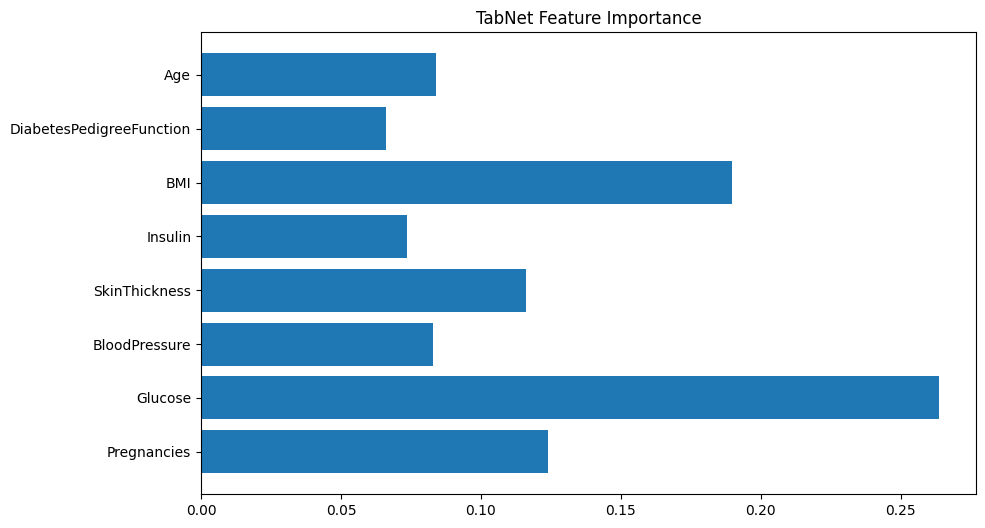

In [154]:
import matplotlib.pyplot as plt
feature_names = X.columns.tolist()

# Plot feature importance
tabnet_clf.explain_weights_ = tabnet_clf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(tabnet_clf.explain_weights_)), tabnet_clf.explain_weights_)
plt.yticks(range(len(feature_names)), feature_names)
plt.title("TabNet Feature Importance")
plt.show()


TabNet After FairCut

In [155]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# === 1. Scale faircut features ===
scaler = StandardScaler()
X_train_faircut = scaler.fit_transform(X_train_faircut).astype(np.float32)
X_test_faircut = scaler.transform(X_test_faircut).astype(np.float32)

# === 2. Convert labels to int ===
y_train_fc = np.array(y_train_faircut).astype(int)
y_test_fc = np.array(y_test_faircut).astype(int)

# === 3. Compute class weights ===
classes = np.unique(y_train_fc)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_fc)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
weights_array = np.vectorize(class_weights_dict.get)(y_train_fc)

# === 4. Define TabNet Classifier ===
tabnet_clf_fc = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=10
)

# === 5. Train TabNet ===
tabnet_clf_fc.fit(
    X_train=X_train_faircut, y_train=y_train_fc,
    eval_set=[(X_train_faircut, y_train_fc), (X_test_faircut, y_test_fc)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.68201 | train_auc: 0.75496 | train_accuracy: 0.73779 | val_auc: 0.69648 | val_accuracy: 0.66883 |  0:00:00s
epoch 10 | loss: 0.51916 | train_auc: 0.86215 | train_accuracy: 0.78502 | val_auc: 0.76407 | val_accuracy: 0.67532 |  0:00:08s
epoch 20 | loss: 0.49047 | train_auc: 0.88018 | train_accuracy: 0.79479 | val_auc: 0.80889 | val_accuracy: 0.70779 |  0:00:16s
epoch 30 | loss: 0.47142 | train_auc: 0.89124 | train_accuracy: 0.79316 | val_auc: 0.79759 | val_accuracy: 0.72727 |  0:00:25s
epoch 40 | loss: 0.46856 | train_auc: 0.89648 | train_accuracy: 0.81596 | val_auc: 0.80352 | val_accuracy: 0.74675 |  0:00:40s
epoch 50 | loss: 0.43339 | train_auc: 0.90195 | train_accuracy: 0.82085 | val_auc: 0.79889 | val_accuracy: 0.74026 |  0:00:53s
epoch 60 | loss: 0.45803 | train_auc: 0.91131 | train_accuracy: 0.82248 | val_auc: 0.79185 | val_accuracy: 0.75325 |  0:01:04s
epoch 70 | loss: 0.43885 | train_auc: 0.90978 | train_accuracy: 0.8241  | val_auc: 0.80593 | val_accuracy: 0.75

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [156]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# === Predictions ===
y_pred_fc = tabnet_clf_fc.predict(X_test_faircut)
y_proba_fc = tabnet_clf_fc.predict_proba(X_test_faircut)[:, 1]

# === Metrics ===
print("Confusion Matrix:\n", confusion_matrix(y_test_fc, y_pred_fc))
print("\nClassification Report:\n", classification_report(y_test_fc, y_pred_fc))
print("Accuracy:", accuracy_score(y_test_fc, y_pred_fc))
print("Precision:", precision_score(y_test_fc, y_pred_fc))
print("Recall:", recall_score(y_test_fc, y_pred_fc))
print("F1 Score:", f1_score(y_test_fc, y_pred_fc))
print("ROC AUC:", roc_auc_score(y_test_fc, y_proba_fc))


Confusion Matrix:
 [[80 20]
 [12 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.68      0.78      0.72        54

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.80      0.79      0.80       154

Accuracy: 0.7922077922077922
Precision: 0.6774193548387096
Recall: 0.7777777777777778
F1 Score: 0.7241379310344828
ROC AUC: 0.8162962962962963


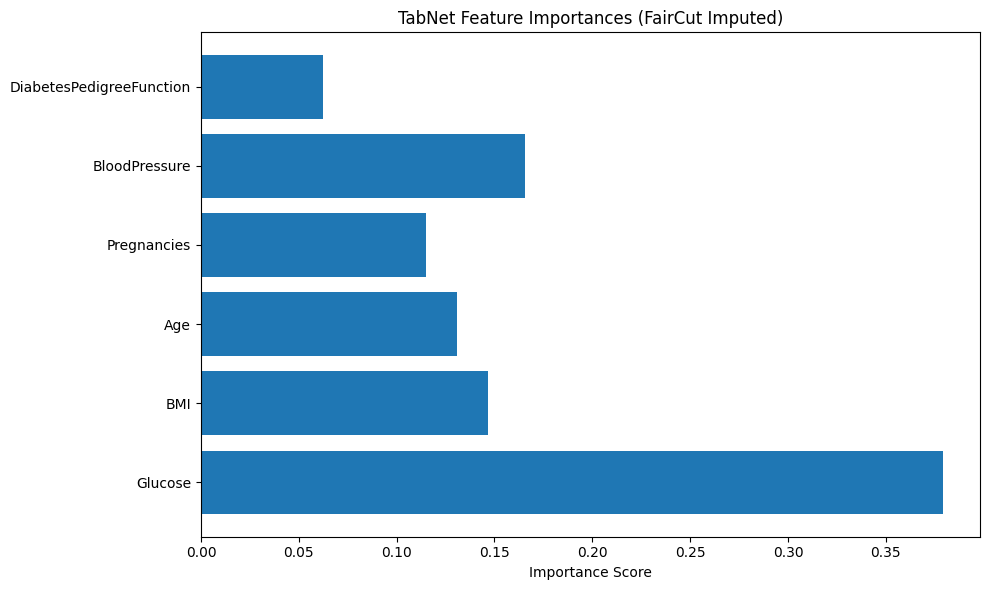

In [157]:
import matplotlib.pyplot as plt

# Names of the 6 features you kept
feature_names = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
importances = tabnet_clf_fc.feature_importances_

# Bar chart
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("TabNet Feature Importances (FairCut Imputed)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


SHAP Analysis TabNet

In [158]:
# 1. Define a SHAP-compatible prediction function
def predict_fn(x_np):
    x_tensor = torch.tensor(x_np, dtype=torch.float32)
    return tabnet_clf2.predict_proba(x_tensor.numpy())[:, 1]  # only positive class

# 2. Select background data and samples for explanation
X_bg = X_train[:100]     # background data (SHAP uses this to integrate out features)
X_sample = X_test[:50]   # test subset to explain

# 3. Create SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_fn, X_bg)

# 4. Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# 5. Summary plot
shap.summary_plot(shap_values, X_sample, feature_names=X_test.columns.tolist())

# 6. Force plot for first sample
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=X_test.columns.tolist())

  0%|          | 0/50 [00:00<?, ?it/s]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Implementing FTTransformer

In [ ]:
pip install rtdl pytorch-tabular


In [ ]:
!pip install rtdl==0.0.13


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


In [ ]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install --upgrade --force-reinstall torch torchvision torchaudio


In [ ]:
from inspect import signature
from rtdl import FTTransformer
print(signature(FTTransformer.make_default))


In [ ]:
# === 1. Imports ===
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report
)
from rtdl import FTTransformer
import pandas as pd
import numpy as np

# === 2. Load and preprocess ===
df = pd.read_csv("diabetes.csv")  # path to your dataset
X = df.drop("Outcome", axis=1).values.astype(np.float32)
y = df["Outcome"].values.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# === 3. DataLoaders ===
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train).unsqueeze(1))
test_ds = TensorDataset(torch.tensor(X_test), torch.tensor(y_test).unsqueeze(1))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
test_loader = DataLoader(test_ds, batch_size=32, num_workers=0)

# === 4. Define model ===
model = FTTransformer.make_default(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,  # No categorical features
    d_out=1
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === 5. Training ===
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 25

model.train()
for epoch in range(n_epochs):
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb, x_cat=None)  # <-- fixed line
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss:.4f}")

# === 6. Evaluation ===
model.eval()
all_probs, all_preds, all_labels = [], [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb, x_cat=None).squeeze()  # <-- fixed line
        probs = torch.sigmoid(logits).cpu().numpy()
        preds = (probs >= 0.5).astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(yb.squeeze().numpy())

# === 7. Metrics ===
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds))
print("Recall:", recall_score(all_labels, all_preds))
print("F1 Score:", f1_score(all_labels, all_preds))
print("AUC:", roc_auc_score(all_labels, all_probs))
print("R² Score:", r2_score(all_labels, all_probs))
print("\nConfusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("\nFT Transformer Classification Report:\n", classification_report(all_labels, all_preds))


In [ ]:
pip install --upgrade rtdl


Improvised FTTransformer

In [ ]:
# === 1. Imports ===
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report
)
from rtdl import FTTransformer  # <-- only this works in your setup
import pandas as pd
import numpy as np

# === 2. Load & Preprocess Data ===
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome", axis=1).values.astype(np.float32)
y = df["Outcome"].values.astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, stratify=y_train_full, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# === 3. Dataloaders ===
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train).unsqueeze(1))
val_ds = TensorDataset(torch.tensor(X_val), torch.tensor(y_val).unsqueeze(1))
test_ds = TensorDataset(torch.tensor(X_test), torch.tensor(y_test).unsqueeze(1))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

# === 4. Define FTTransformer with default config ===
model = FTTransformer.make_default(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,
    d_out=1
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === 5. Weighted Loss + Optimizer ===
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight], device=device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

# === 6. Training with Early Stopping ===
best_val_auc = 0
best_model_state = None
patience = 10
counter = 0

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb, x_cat=None)
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

    # Validation
    model.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb, x_cat=None).squeeze()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(yb.squeeze().numpy())
    val_auc = roc_auc_score(all_labels, all_probs)
    print(f"Epoch {epoch+1}, Val AUC: {val_auc:.4f}")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping.")
            break

# === 7. Load Best Model & Evaluate on Test Set ===
model.load_state_dict(best_model_state)
model.eval()

all_probs, all_preds, all_labels = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb, x_cat=None).squeeze()
        probs = torch.sigmoid(logits).cpu().numpy()
        preds = (probs >= 0.5).astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(yb.squeeze().numpy())

# === 8. Print Final Metrics ===
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("\nClassification Report:\n", classification_report(all_labels, all_preds))
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds))
print("Recall:", recall_score(all_labels, all_preds))
print("F1 Score:", f1_score(all_labels, all_preds))
print("ROC AUC:", roc_auc_score(all_labels, all_probs))
print("R² Score:", r2_score(all_labels, all_probs))


FairCut FTTransformer

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, confusion_matrix, classification_report
)
from rtdl import FTTransformer
import numpy as np

# === 1. Prepare FairCut-Imputed Data ===

# Already done earlier:
# X_train_faircut, X_test_faircut, y_train_faircut, y_test_faircut

# Split off validation set
X_train_fc, X_val_fc, y_train_fc, y_val_fc = train_test_split(
    X_train_faircut, y_train_faircut, test_size=0.1, stratify=y_train_faircut, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_fc = scaler.fit_transform(X_train_fc)
X_val_fc = scaler.transform(X_val_fc)
X_test_fc = scaler.transform(X_test_faircut)

# Convert to tensors and create dataloaders
train_ds = TensorDataset(torch.tensor(X_train_fc), torch.tensor(y_train_fc).unsqueeze(1))
val_ds = TensorDataset(torch.tensor(X_val_fc), torch.tensor(y_val_fc).unsqueeze(1))
test_ds = TensorDataset(torch.tensor(X_test_fc), torch.tensor(y_test_faircut).unsqueeze(1))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

# === 2. Define FTTransformer ===
model = FTTransformer.make_default(
    n_num_features=X_train_fc.shape[1],
    cat_cardinalities=None,
    d_out=1
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === 3. Weighted Loss + Optimizer ===
pos_weight = (y_train_fc == 0).sum() / (y_train_fc == 1).sum()
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight], device=device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

# === 4. Training with Early Stopping ===
best_val_auc = 0
best_model_state = None
patience = 10
counter = 0

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb, x_cat=None)
        loss = criterion(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()

    # Validation
    model.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb, x_cat=None).squeeze()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(yb.squeeze().numpy())
    val_auc = roc_auc_score(all_labels, all_probs)
    print(f"Epoch {epoch+1}, Val AUC: {val_auc:.4f}")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping.")
            break

# === 5. Load Best Model & Evaluate on Test Set ===
model.load_state_dict(best_model_state)
model.eval()

all_probs, all_preds, all_labels = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb, x_cat=None).squeeze()
        probs = torch.sigmoid(logits).cpu().numpy()
        preds = (probs >= 0.5).astype(int)
        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(yb.squeeze().numpy())

# === 6. Final Metrics ===
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("\nClassification Report:\n", classification_report(all_labels, all_preds))
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Precision:", precision_score(all_labels, all_preds))
print("Recall:", recall_score(all_labels, all_preds))
print("F1 Score:", f1_score(all_labels, all_preds))
print("ROC AUC:", roc_auc_score(all_labels, all_probs))
print("R² Score:", r2_score(all_labels, all_probs))


In [ ]:
pip install rtdl pytorch-tabular